# Importing Basic libraries



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Task 1:Data Preprocessing**

# Loading the dataset

In [ ]:
# Loading the dataset
anime = pd.read_csv('anime.csv')
print(f"Dataset loaded successfully!")
print(f'Dataset shape:{anime.shape}')
print(f'Dataset columns:{anime.columns}')
print('Dataset structure')
anime.head()

Dataset loaded successfully!
Dataset shape:(12294, 7)
Dataset columns:Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')
Dataset structure


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
# Dataset info
print('Dataset info:')
anime.info()
# Statistical summary
print('Statistical summary:')
anime.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
Statistical summary:


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
# Converting episodes col to numerical format
print('Converting episodes col to numeric col!')
anime['episodes'] = anime['episodes'].replace('Unknown',np.nan)
anime['episodes'] = anime['episodes'].astype(float)

Converting episodes col to numeric col!


In [ ]:
#Check for Missing values
print('Missing values analysis:')
Missing_values = anime.isnull().sum()
print(Missing_values)
print('The Total missing values are:',Missing_values.sum())

Missing values analysis:
anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64
The Total missing values are: 657


In [ ]:
# Handle Missing values
print('Handling missing values of categorical cols')
# Filling genre,type with "unknown" as they both are categorical columns
anime['genre'] =anime['genre'].fillna('unknown')
anime['type'] = anime['type'].fillna('unknown')
Check_for_null_vals = anime[['genre','type']].isnull().sum()
print('Check for null values: \n ', Check_for_null_vals)
print('categorical columns are successfully handled!')


Handling missing values of categorical cols
Check for null values: 
  genre    0
type     0
dtype: int64
categorical columns are successfully handled!


Handling missing values of numerical col(rating)
Analysing the type of imputation method to be used:


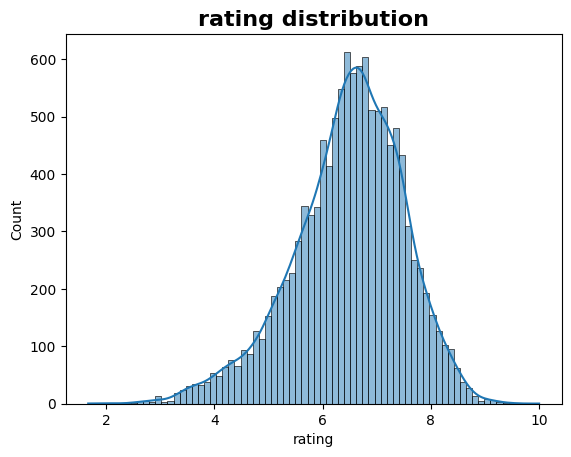

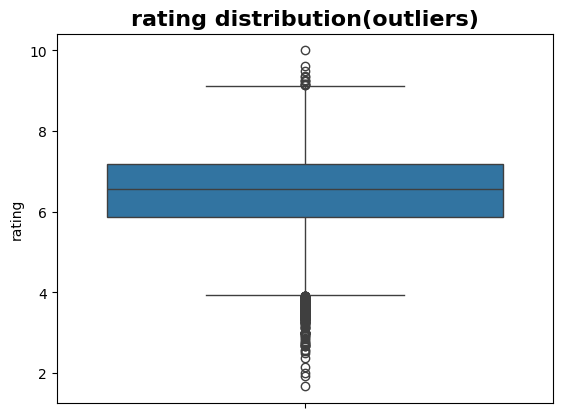

Applying median imputation method to fill missing values
Check for null values: 0
median imputation method is successfully applied!
Final check for null values: anime_id      0
name          0
genre         0
type          0
episodes    340
rating        0
members       0
dtype: int64


In [ ]:
print('Handling missing values of numerical col(rating)')
#Analysing rating distribution to determine the type of imputation method to apply
print('Analysing the type of imputation method to be used:')
sns.histplot(anime['rating'],kde = True)
plt.title('rating distribution',fontsize = 16,fontweight = 'bold')
plt.show()
sns.boxplot(anime['rating'])
plt.title('rating distribution(outliers)',fontsize = 16,fontweight = 'bold')
plt.show()


# Applying median imputation method to fill missing values
print('Applying median imputation method to fill missing values')
anime['rating'] = anime['rating'].fillna(anime['rating'].median())
Check_for_null_vals = anime['rating'].isnull().sum()
print('Check for null values:',Check_for_null_vals)
print('median imputation method is successfully applied!')
final_check_for_null_vals = anime.isnull().sum()
print('Final check for null values:',final_check_for_null_vals)

In [ ]:
# Dataset attributes
print('Dataset Attributes Exploration:')
print('unique anime_id:',anime['anime_id'].nunique()) # To avoid duplicates of anime_id's
print('unique anime_name:',anime['name'].nunique())
print('unique anime type:',anime['type'].unique())

print('unique anime_genre:',anime['genre'].nunique())
print(f"Unique genres_combinations: {len(anime['genre'].unique())}")
print('anime type_counts:',anime['type'].value_counts().to_dict())
print('anime rating range:',anime['rating'].min(), 'to',anime['rating'].max())
print('anime episodes range:', anime['episodes'].min(), 'to',anime['episodes'].max())
print('anime members range:',anime['members'].min(), 'to',anime['members'].max())

Dataset Attributes Exploration:
unique anime_id: 12294
unique anime_name: 12292
unique anime type: ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' 'unknown']
unique anime_genre: 3265
Unique genres_combinations: 3265
anime type_counts: {'TV': 3787, 'OVA': 3311, 'Movie': 2348, 'Special': 1676, 'ONA': 659, 'Music': 488, 'unknown': 25}
anime rating range: 1.67 to 10.0
anime episodes range: 1.0 to 1818.0
anime members range: 5 to 1013917


# **Task 2: Feature Extraction**

In [ ]:
def extract_features(anime):
    # Creating a copy of anime for feature engineering
    anime_features = anime.copy()

    # Applying Tf-idf on genre feature
    print('Implementing Tf-Idf on genre feature')
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf = TfidfVectorizer(max_features=50, token_pattern=r'[^,]+')

    # Taking top 50 most common genres to avoid overfitting; token_pattern=r'[^,]+' splits by comma
    genre_features = tfidf.fit_transform(anime_features['genre']).toarray()
    print('Genre feature shape:', genre_features.shape)
    print('Tf-Idf applied successfully!\n')

    # Applying one-hot encoding on type
    print('Implementing one-hot encoding on type')
    import pandas as pd
    type_dummies = pd.get_dummies(anime_features['type'], prefix='type')
    print(f"Type feature shape: {type_dummies.shape}")
    print('Columns in type dummy:', type_dummies.columns.tolist())
    print('One-hot encoding applied successfully!\n')

    # Normalization of numerical features
    print('Implementing normalization on numerical features')
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    numerical_features = anime_features[['episodes', 'rating', 'members']].copy()

    # Handling edge cases (Applying clipping to handle outliers)
    # Clipping does not remove outliers but instead it brings the outlier values towards the boundary (upper or lower)
    numerical_features['rating'] = numerical_features['rating'].clip(0, 10)
    numerical_features['episodes'] = numerical_features['episodes'].clip(0, numerical_features['episodes'].quantile(0.99))
    numerical_features['members'] = numerical_features['members'].clip(0, numerical_features['members'].quantile(0.99))

    # Applying normalization
    numerical_features_scaled = scaler.fit_transform(numerical_features)
    print('Scaled numerical_features shape:', numerical_features_scaled.shape)
    print(f"Features: rating, episodes, members\n")

    # Combine all features
    print('---Combining all the features...')
    import numpy as np
    # All features are 2D arrays → combine horizontally into one single 2D array
    combined_features = np.hstack([
        genre_features,
        type_dummies.values,
        numerical_features_scaled
    ])
    combined_features = np.nan_to_num(combined_features, nan=0.0, posinf=0.0, neginf=0.0)
    print('Shape of combined features:', combined_features.shape)
    print('Combined all features successfully!\n')
    return combined_features,anime_features

combined_features, anime_features = extract_features(anime)


Implementing Tf-Idf on genre feature
Genre feature shape: (12294, 50)
Tf-Idf applied successfully!

Implementing one-hot encoding on type
Type feature shape: (12294, 7)
Columns in type dummy: ['type_Movie', 'type_Music', 'type_ONA', 'type_OVA', 'type_Special', 'type_TV', 'type_unknown']
One-hot encoding applied successfully!

Implementing normalization on numerical features
Scaled numerical_features shape: (12294, 3)
Features: rating, episodes, members

---Combining all the features...
Shape of combined features: (12294, 60)
Combined all features successfully!



# **Task 3:Recommendation system**

In [ ]:
# Building recommendation system
print('Recommendation system')
def build_recommendation_system(anime, combined_features, threshold=0.3):
  print('Building recommendation system using cosine similarity')
  from sklearn.metrics.pairwise import cosine_similarity
  similarity_matrix = cosine_similarity(combined_features)
  print('similarity matrix shape:', similarity_matrix.shape)
  print('similarity matrix range:', similarity_matrix.min(), similarity_matrix.max())
  return similarity_matrix

similarity_matrix = build_recommendation_system(anime, combined_features)

def recommend_anime(anime_name, anime, similarity_matrix, threshold=0.3, top_n=10):
  print('Implementing try and except blocks for error handling')
  try:
    idx = anime[anime['name'].str.lower() == anime_name.lower()].index[0]  # here the anime name entered by user and anime name in the dataset is matched
  #The anime name entered by user and anime name in the dataset is,if matched then row number is accessed where there is a match of anime names using the above condition
  except:
    print(f'\nThe anime {anime_name} is not found in the dataset!')
    return None
  '''The above code does not return anything it is only for error handling when user enters a anime name if it is not found then the whole code
   crashes that means program will be crashed.To avoid that problem  user is informed that anime name is not found in the dataset'''

  # Obtaining similarity scores in a list based on the target anime_name entered by the user
  sim_scores = list(enumerate(similarity_matrix[idx]))

  # Filtering target anime using threshold
  sim_scores = [(i, score) for i, score in sim_scores if score >= threshold and i != idx]
  '''Used list comprehension to filter the threshold and to remove the anime recommending itself using i != idx.The anime might recommend
  itself because the similarity score of the anime itself will be 1.0 which might lead to anime recommending the anime itself'''

  # Sorting the scores in descending order(The goal is to get most similar anime), more similarity score = better recommendation
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Getting top 10 similarity scores using list slicing
  sim_scores = sim_scores[:top_n]

  # Accesing only anime index
  anime_indices = [i[0] for i in sim_scores]
  '''here i am accesing only index valuesof anime from sim_scores instead of actual scores
   i[0] is for index number accessing and i[1] is for accesing scores in sim_scores.sim_scores has index numbers and
   similarity scores in the tuple format'''

  recommendations = anime.iloc[anime_indices][['name', 'genre', 'type', 'episodes', 'members']].copy()
  recommendations['similarity_scores'] = [score for _, score in sim_scores]

  return recommendations


def demonstrate_recommendations(anime, similarity_matrix):
  #User interactive Recommendation system
  print("\n" + "=" * 80)
  print('Anime Recommendation system')
  print('=' * 80)

  while True:
     # While true is a infinite loop that runs forever until we stop uit using a break statement


    print('\n' + "-" * 80)
    print('Search for anime')
    print('-' * 80)
    # Get anime name
    anime_name = input("\n Enter anime name (or quit to exit): ").strip()
    print(f'\nYou searched for:{anime_name}')
    # .strip() removes extra spacings before and after the anime name  when user enters an anime name

    if anime_name.lower() in ['quit', 'exit', 'q', '']:
      print('\nThank you for using the recommendation system')
      break

    # Number of recommendations
    try:
      top_n = int(input('\n Enter number of recommendations(default 10): ') or 10) #gets top 10 recommendations if user hasn't given
    except ValueError:
      top_n = 10
    '''
    The above try and except blocks prevent the program from crashing it is a very good method to handle the error caused due
    to user typing mistake like no of recommendations are to be in numbers but if a user enters abc or any other alphabets then
    it leads to an error.Then comes the except block like a saviour to avoid error and gives top 10 recommendations irrespecive of the
    user typing mistake'''
    print(f'Number of similar anime recommendations are :{top_n}')

    # Asking the user for threshold(Minimum similarity)
    try:
      threshold = float(input("\n Enter threshold (or default 0.3): ") or 0.3)
    except ValueError:
      threshold = 0.3
    print(f'\nthreshold(minimum similarity)to find similar anime is:{threshold}')


    print('\n' + '-' *80)
    print('Recommendations')
    print('-' * 80)
    # Get recommendations
    recommendations = recommend_anime(anime_name, anime, similarity_matrix, threshold=threshold, top_n=top_n)
    # recommendations is a dataframe and recommend_anime is a function that was defined before and now that same function recommend anime is called
    if recommendations is not None:
      print(recommendations.to_string(index=False))
      print(f'\nSuccesfully found {len(recommendations)} similar anime to {anime_name}')

      # Asking user whether he/she wants to continue using recommendation system
      continue_choice = input("\nDo you wish to continue using recommendation system ? (Type NO to exit): ").strip().lower()
      if continue_choice == 'no':
        print('\n' + '*' * 80)
        print('Thank you for using Recommendation system!')
        print('*' * 80)
        break


demonstrate_recommendations(anime, similarity_matrix)


Recommendation system
Building recommendation system using cosine similarity
similarity matrix shape: (12294, 12294)
similarity matrix range: 0.0 1.0000000000000004

Anime Recommendation system

--------------------------------------------------------------------------------
Search for anime
--------------------------------------------------------------------------------

 Enter anime name (or quit to exit): naruto 

You searched for:naruto

 Enter number of recommendations(default 10): 5
Number of similar anime recommendations are :5

 Enter threshold (or default 0.3): 

threshold(minimum similarity)to find similar anime is:0.3

--------------------------------------------------------------------------------
Recommendations
--------------------------------------------------------------------------------
Implementing try and except blocks for error handling
                  name                                                                  genre type  episodes  members  similarity_

# **Task-4: Evaluation**

In [ ]:
import numpy as np

print('\n' + "=" * 80)
print('Evaluation')
print('=' * 80)
print('splitting the data into train and test')
print(
    "For a content-based recommendation system like mine, a typical train_test_split isn't the most intuitive approach"
    "because we're not training a predictive model in the traditional sense. Instead, we evaluate the quality of the recommendations"
)
print('Not using train_test_split instead randomly picking 100 animes')

def evaluate_recommender(anime, similarity_matrix, test_sample_size=100, top_n=10):
    print(f'Starting evaluation by randomly picking {test_sample_size} anime')
    # Creating an empty list of  metrics to store the scores of each anime
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Randomly picking 100 anime's
    test_indices = np.random.choice(anime.index, size=test_sample_size, replace=False)
    # Looping through the random anime
    for idx in test_indices:
        original_genres = set(str(anime.loc[idx,'genre']).replace(' ', '').split(',')) # obtaining genres of random anime's
        all_relevant_anime_indices = set() # Creating an empty set to store similar anime indices respective to the random anime picked during test_indices
        for i, row in anime.iterrows(): # Looping through each row in the dataset
            if i == idx: # Skipping same  anime recommending itself
                continue # Continue skips executing code in the if condition i.e.,i=idx
            current_genres = set(str(row['genre']).replace(' ', '').split(','))
            if not original_genres.isdisjoint(current_genres): # checking whether the anime in original_genres and current_genres share atleast one common genre
                all_relevant_anime_indices.add(i) # Storing all the anime indices that are having similar genres respective to the test_indices

        # Checking the above recommendations to see how well they did using similarity matrix
        # Considering similairy matrix which has all the scores of every anime to get the target anime recommendation
        sim_scores = list(enumerate(similarity_matrix[idx]))
        sim_scores_sorted = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        recommended_indices = [i[0] for i in sim_scores_sorted[1:top_n + 1]] # using list slicing to skip first index[0] as we do not want anime recommending itself
        # recommended indices has now has all the similarity scores of the target anime[idx]

        # Getting the True positives(correct recommendations)
        true_positives = len(set(recommended_indices).intersection(all_relevant_anime_indices)) # counts the common elements between both the sets()

        # precision
        precision = true_positives / top_n if top_n > 0 else 0 # if condition used to avoid error in the output

        # recall
        recall = true_positives / len(all_relevant_anime_indices) if len(all_relevant_anime_indices) > 0 else 0

        # f1_score
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1_score)

    # Calculate the average scores of all the metrics used to calculate anime's recommendations
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    print("\nEvaluation Complete!\n" + "="*40)
    print(f"Average Precision for {top_n} recommendations: {avg_precision:.2f}")
    print(f"Average Recall for {top_n} recommendations:    {avg_recall:.2f}")
    print(f"Average F1-Score for {top_n} recommendations:   {avg_f1:.2f}")
    print("="*40)

evaluate_recommender(anime, similarity_matrix, test_sample_size=100, top_n=10)



Evaluation
splitting the data into train and test
For a content-based recommendation system like mine, a typical train_test_split isn't the most intuitive approachbecause we're not training a predictive model in the traditional sense. Instead, we evaluate the quality of the recommendations
Not using train_test_split instead randomly picking 100 animes
Starting evaluation by randomly picking 100 anime

Evaluation Complete!
Average Precision for 10 recommendations: 0.97
Average Recall for 10 recommendations:    0.00
Average F1-Score for 10 recommendations:   0.01


The recommender has high precision (0.97), meaning its recommendations are mostly correct, but very low recall (0.00), so it misses many relevant anime. To improve, we can expand Top-N recommendations, enhance genre similarity, include additional features, or use a hybrid approach to capture more relevant items.

# **Difference between user based and item based Collaborative filtering**



User-Based Collaborative Filtering recommends items by finding users with similar tastes and suggesting what they liked. Item-Based Collaborative Filtering recommends items similar to what the user has already liked. In short, user-based = similar users, item-based = similar items. User-based is intuitive but less scalable, while item-based is more efficient and widely used in real-world systems.

# **Collaborative filtering**

Collaborative Filtering is a technique used in recommendation systems that suggests items to a user based on past interactions or behavior of users. It works on the principle that users with similar tastes tend to like similar items, or that items liked by the user are similar to other items liked by other users.

There are two main types:

User-Based Collaborative Filtering: Finds users similar to the target user and recommends items those similar users liked.

Item-Based Collaborative Filtering: Finds items similar to what the user has already liked and recommends those.